# Neural Network with the fashion MNIST dataset 


### Dependencies:
	tensorflow
	tf.keras 
	numpy
	matplotlib

### Dataset:
	- the fasion MNIST dataset: https://github.com/zalandoresearch/fashion-mnist
	- contains 70,000 greyscale images in 10 categories 
	- the images show individual articles of clothing at low resolution (28x28px)
	- Training set: 60,000 images, Testing set: 10,000 images
       
### Model:
    - Keras Sequential model (linear stack of layers)
    - 3 layers with activation functions: rectified linear and softmax
    - loss function: sparse_categorical_crossentropy
    - optimizer: adam
    - evaluation metrics: single point accuracy 
    
### Outcome:
    - Accuracy: ~87% on training data, ~87% on test data
    

In [1]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt 

print (tf.__version__) # 1.12.0

1.12.0


### 1. Import and load the fashion MNIST data from tensorflow 

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# returns 4 numpy arrays: 2 training sets and 2 test sets
# images: 28x28 arrays, pixel values: 0 to 255
# labels: array of integers: 0 to 9 => class of clothings
# Training set: 60,000 images
# Testing set: 10,000 images

# class names are not included, need to create them to plot the images  
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


### 2. Explore the data

In [3]:
train_images.shape #(60000, 28, 28)
len(train_labels) #60000
test_images.shape #(10000, 28, 28)
len(test_labels) #10000

10000

### 3. Preprocess the data 

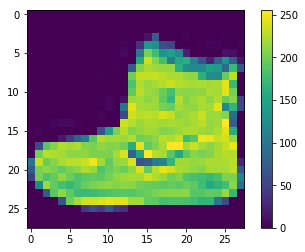

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

# scale the values to a range of 0 to 1 of both data sets
train_images = train_images / 255.0
test_images = test_images / 255.0


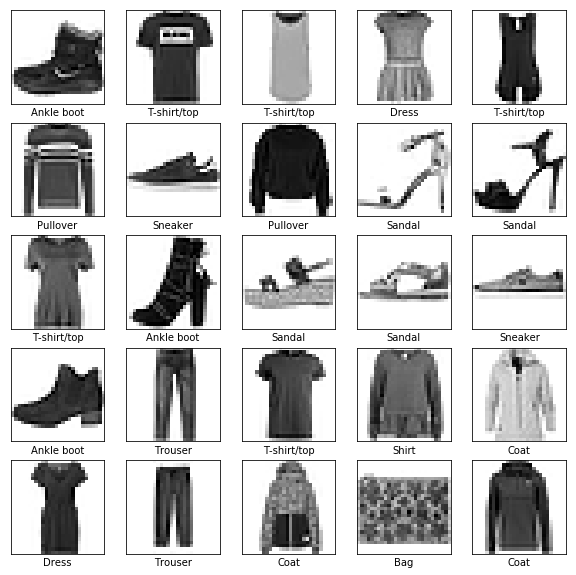

In [5]:
# display the first 25 images from the training set and display the class name below each image
# verify that data is in correct format
plt.figure(figsize=(10,10))
for i in range(25):
	plt.subplot(5,5, i+1)
	plt.xticks([])
	plt.yticks([])
	plt.grid(False)
	plt.imshow(train_images[i], cmap=plt.cm.binary)
	plt.xlabel(class_names[train_labels[i]])
	

### 4. Build the model 

In [6]:
# Setup the layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
# the first layer transforms the format of the image from 2D to 1D array of 784 pixels
# the next 2 layers are densely connected neural layers
# the first dense layer has 128 nodes/neurons
# the second dense layer is a 10-node softmax layer, this returns an array of 10 probability scores that sum to 1
# each node contains a score that indicates the probability that the current image belonds to one of the 10 classes

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Loss function —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
#Optimizer —This is how the model is updated based on the data it sees and its loss function.
#Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

### 5. Train the model

In [7]:
# Feed the training data to the model—in this example, the train_images and train_labels arrays.
# The model learns to associate images and labels.
# We ask the model to make predictions about a test set—in this example, the test_images array. We verify that the predictions match the labels from the test_labels array.

model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
60000/60000 [==============================] - 7s 117us/step - loss: 0.5030 - acc: 0.8239
Epoch 2/5
60000/60000 [==============================] - 7s 115us/step - loss: 0.3773 - acc: 0.8649
Epoch 3/5
60000/60000 [==============================] - 7s 112us/step - loss: 0.3372 - acc: 0.8782
Epoch 4/5
60000/60000 [==============================] - 8s 127us/step - loss: 0.3147 - acc: 0.8841
Epoch 5/5
60000/60000 [==============================] - 7s 121us/step - loss: 0.2926 - acc: 0.8927


### 6. Evaluate accuracy 

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

10000/10000 [==============================] - 1s 57us/step
Test accuracy: 0.8714


### 7. Make predictions

In [9]:
# confidence of the model that the image corresponds to the label 
predictions = model.predict(test_images)
predictions.shape #(10000, 10)
predictions[0]

array([3.9154288e-06, 2.9238580e-08, 3.0831117e-05, 2.9259891e-08,
       5.7849566e-06, 2.0187956e-01, 3.1379448e-05, 1.3140877e-01,
       6.1677376e-05, 6.6657805e-01], dtype=float32)

In [10]:
np.argmax(predictions[0])

9

In [11]:
class_names[9]

'Ankle boot'

In [12]:
#Ankle boot has the highest confidence value 
test_labels[0]


9

In [20]:
# plot image in a grid
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
# plot the value array    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot= plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

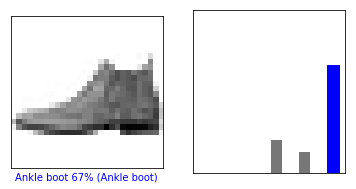

In [22]:
# look at 0th image, predictions, prediction array
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

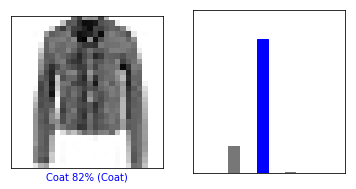

In [32]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

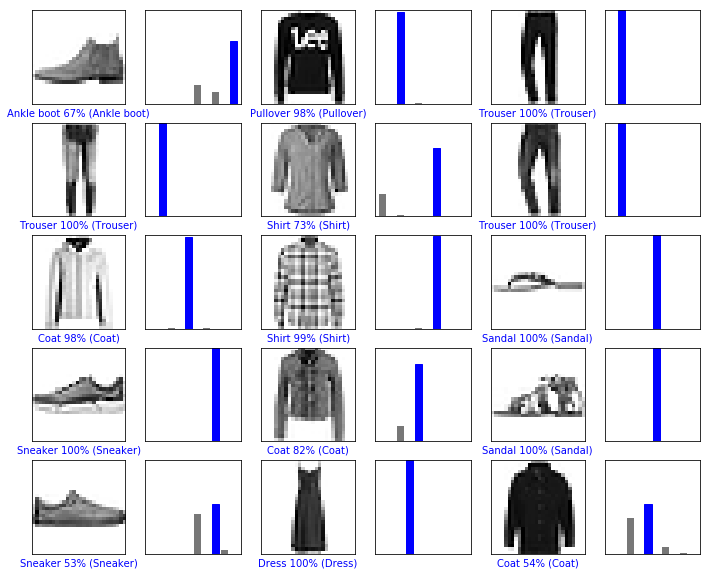

In [33]:
# Plot the first 15 test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [34]:
# apply the trained model to make prediction about a single image
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [35]:
#tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [36]:
# Predict the image
predictions_single = model.predict(img)
# returns a list of lists
print(predictions_single)

[[3.9154297e-06 2.9238532e-08 3.0831092e-05 2.9259844e-08 5.7849529e-06
  2.0187938e-01 3.1379484e-05 1.3140874e-01 6.1677332e-05 6.6657823e-01]]


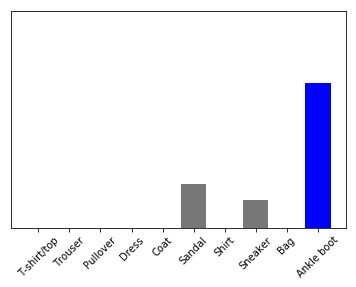

In [37]:
plot_value_array(0,predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [38]:
np.argmax(predictions_single[0])

9